In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [4]:
df.shape

(8425, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [7]:
df = df.dropna(axis = 0)
df.shape

(6332, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 8423
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6332 non-null   float64
 1   MaxTemp        6332 non-null   float64
 2   Rainfall       6332 non-null   float64
 3   WindGustDir    6332 non-null   object 
 4   WindGustSpeed  6332 non-null   float64
 5   WindDir9am     6332 non-null   object 
 6   WindDir3pm     6332 non-null   object 
 7   WindSpeed9am   6332 non-null   float64
 8   WindSpeed3pm   6332 non-null   float64
 9   Humidity9am    6332 non-null   float64
 10  Humidity3pm    6332 non-null   float64
 11  Pressure9am    6332 non-null   float64
 12  Pressure3pm    6332 non-null   float64
 13  Temp9am        6332 non-null   float64
 14  Temp3pm        6332 non-null   float64
 15  RainToday      6332 non-null   object 
 16  RainTomorrow   6332 non-null   object 
dtypes: float64(12), object(5)
memory usage: 890.4+ KB


In [8]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [33]:
df.groupby('Rainfall').mean()

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Rainfall,,,,,,,,,,,,,,,,
0.0,13.442487,25.358160,7.131560,40.594057,7.014139,7.380302,15.695663,19.695183,60.827462,45.565061,1018.075869,1015.270525,18.826072,23.906902,0.0,0.141625
0.2,13.175547,22.441241,8.113139,38.489051,8.821168,8.131387,14.525547,18.810219,72.105839,56.437956,1018.033577,1015.666058,17.028832,21.086861,0.0,0.237226
0.4,13.979710,22.334783,8.731884,40.340580,8.833333,8.159420,15.876812,20.746377,69.862319,59.101449,1017.813768,1016.038406,17.792029,20.846377,0.0,0.318841
0.6,13.882353,22.217647,9.776471,43.835294,8.717647,8.905882,17.435294,22.623529,69.894118,56.517647,1016.635294,1014.872941,17.584706,20.648235,0.0,0.341176
0.7,17.900000,27.100000,10.000000,39.000000,15.000000,10.000000,13.000000,24.000000,93.000000,65.000000,1018.500000,1017.500000,21.200000,26.300000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110.8,16.000000,23.200000,12.000000,26.000000,15.000000,8.000000,13.000000,17.000000,87.000000,65.000000,1021.300000,1018.100000,19.000000,22.600000,1.0,0.000000
128.0,16.200000,19.500000,9.000000,61.000000,2.000000,9.000000,28.000000,35.000000,93.000000,92.000000,1021.200000,1018.100000,18.200000,18.900000,1.0,1.000000
142.2,24.100000,29.800000,14.000000,78.000000,14.000000,7.000000,33.000000,28.000000,98.000000,84.000000,1005.900000,1002.500000,24.500000,28.300000,1.0,1.000000


In [35]:
df['Rainfall'].value_counts().values

array([4173,  274,  138,   85,   72,   62,   61,   49,   45,   45,   43,
         37,   36,   35,   34,   33,   32,   31,   29,   27,   27,   26,
         26,   24,   24,   23,   20,   20,   19,   18,   18,   17,   17,
         16,   16,   15,   15,   14,   14,   14,   13,   13,   13,   12,
         12,   11,   10,   10,   10,   10,    9,    9,    9,    9,    9,
          8,    8,    8,    8,    7,    7,    7,    7,    7,    7,    7,
          7,    6,    6,    6,    6,    6,    6,    6,    6,    6,    6,
          6,    5,    5,    5,    5,    5,    5,    5,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,   

In [38]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


C:\Users\enaxdee\AppData\Local\Temp\ipykernel_17816\2597105628.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\enaxdee\AppData\Local\Temp\ipykernel_17816\2597105628.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\enaxdee\AppData\Local\Temp\ipykernel_17

ValueError: num must be an integer with 1 <= num <= 12, not 13

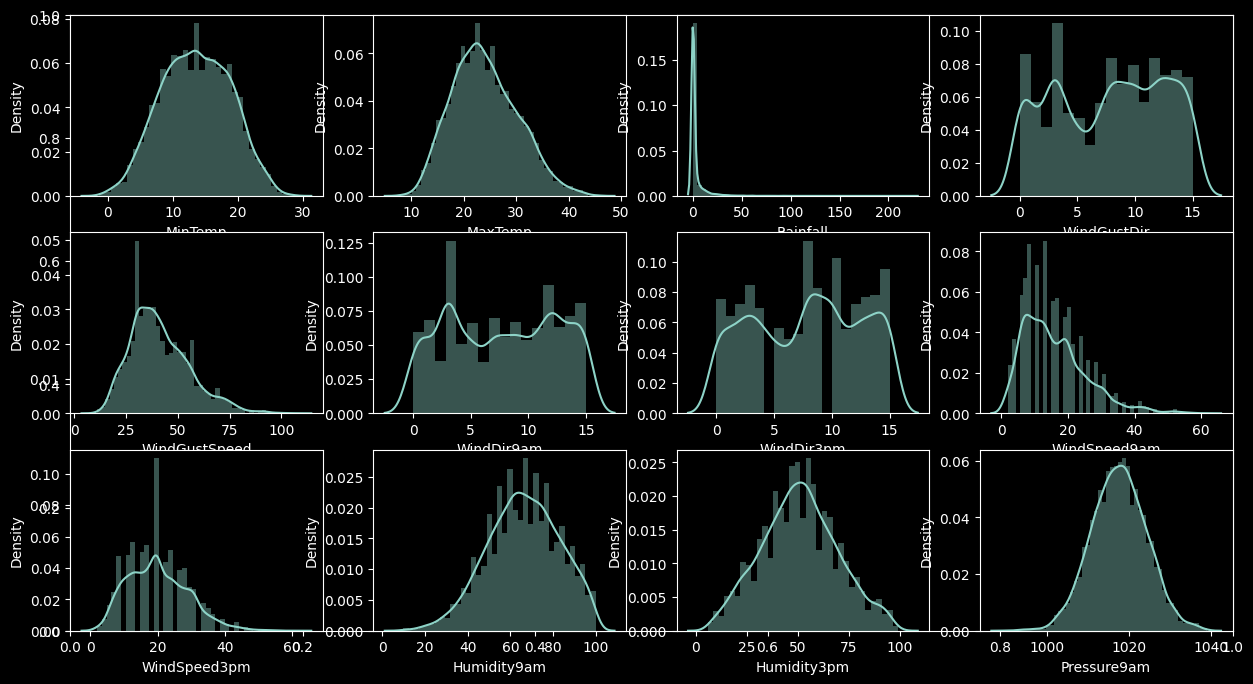

In [40]:

plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [12]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
8420,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


## Model Fitting on Rain tomorrow ##

In [13]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [14]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

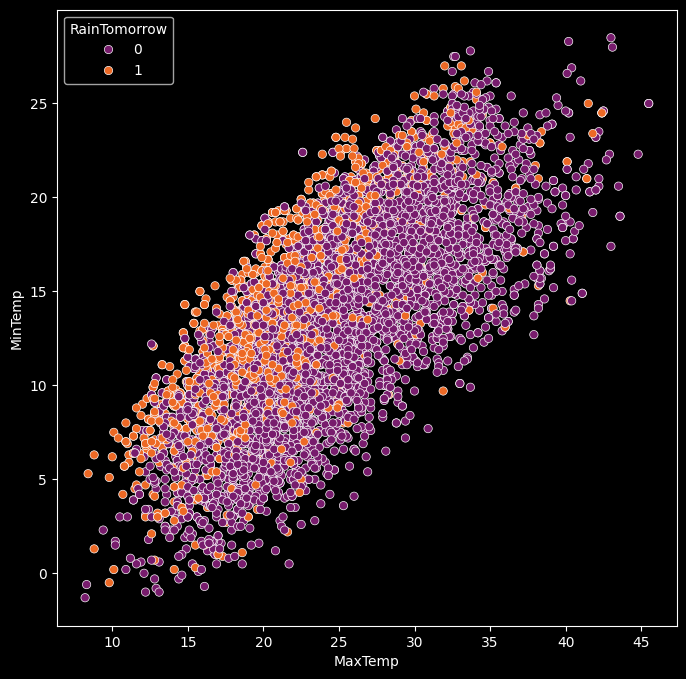

In [15]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

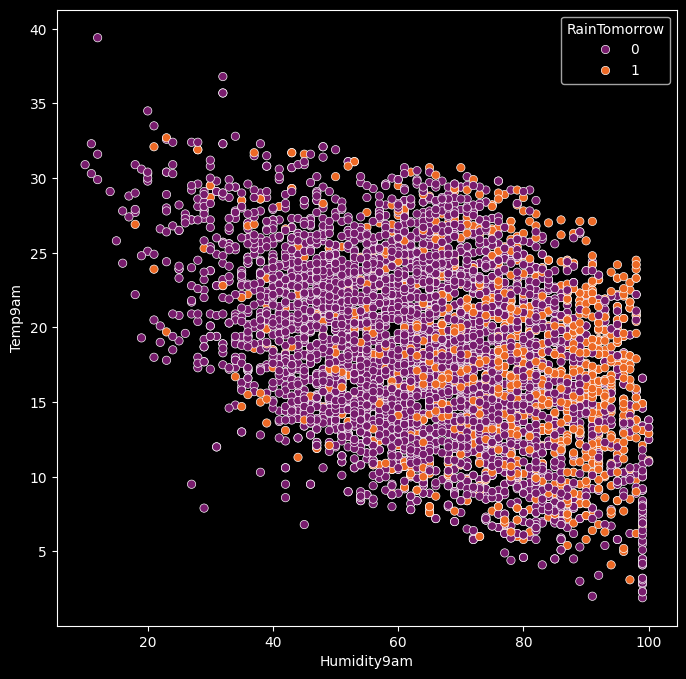

In [16]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

# Heatmap

<Axes: >

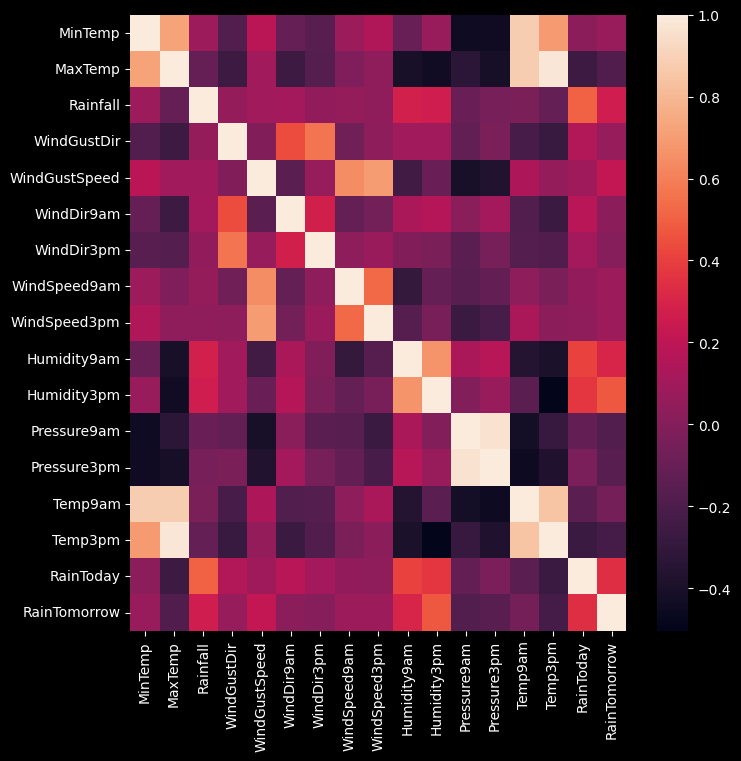

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[900  50]
 [149 168]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       950
           1       0.77      0.53      0.63       317

    accuracy                           0.84      1267
   macro avg       0.81      0.74      0.76      1267
weighted avg       0.84      0.84      0.83      1267

0.8429360694554064


C:\Users\enaxdee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[871  79]
 [ 80 237]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       950
           1       0.75      0.75      0.75       317

    accuracy                           0.87      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.87      0.87      0.87      1267

0.8745067087608525


# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[928  22]
 [ 83 234]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       950
           1       0.91      0.74      0.82       317

    accuracy                           0.92      1267
   macro avg       0.92      0.86      0.88      1267
weighted avg       0.92      0.92      0.91      1267

0.9171270718232044


# XGBoost Classifier

In [24]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print('acc',accuracy_score(y_test,pred))
print('f1',classification_report(y_test,pred))
print('matrix',confusion_matrix(y_test,pred))

acc 0.9108129439621152
f1               precision    recall  f1-score   support

           0       0.92      0.96      0.94       950
           1       0.88      0.75      0.81       317

    accuracy                           0.91      1267
   macro avg       0.90      0.86      0.88      1267
weighted avg       0.91      0.91      0.91      1267

matrix [[916  34]
 [ 79 238]]
